In [1]:
import sklearn
sklearn.__version__

'0.23.2'

In [2]:
#pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df=pd.read_csv('penguins_classification.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [54]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [55]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [56]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [57]:
df['bill_length_mm'].value_counts()

41.1    7
45.2    6
39.6    5
50.0    5
46.5    5
       ..
54.2    1
36.9    1
54.3    1
43.8    1
43.4    1
Name: bill_length_mm, Length: 163, dtype: int64

In [58]:
df['bill_depth_mm'].value_counts()

17.0    12
15.0    10
18.6    10
18.5    10
17.9    10
        ..
13.6     1
17.4     1
20.6     1
13.2     1
13.3     1
Name: bill_depth_mm, Length: 79, dtype: int64

In [59]:
df['flipper_length_mm'].value_counts()

190    21
195    17
187    16
193    14
210    14
191    13
215    12
196    10
197    10
185     9
198     8
208     8
220     8
184     7
230     7
192     7
181     7
212     7
189     7
199     6
201     6
213     6
216     6
222     6
188     6
186     6
209     5
194     5
214     5
203     5
217     5
218     5
219     5
221     5
202     4
180     4
200     4
178     4
225     4
228     4
224     3
182     3
205     3
207     2
211     2
223     2
183     2
229     2
176     1
174     1
231     1
206     1
226     1
172     1
Name: flipper_length_mm, dtype: int64

In [60]:
df['body_mass_g'].value_counts()

3800    12
3950    10
3700    10
3900    10
3550     9
        ..
4775     1
3850     1
3575     1
4275     1
3075     1
Name: body_mass_g, Length: 93, dtype: int64

In [61]:
df['sex'].value_counts()

male      168
female    165
Name: sex, dtype: int64

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

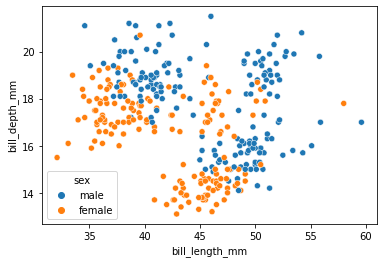

In [62]:
sns.scatterplot(x=df['bill_length_mm'],y=df['bill_depth_mm'],hue=df['sex'])

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

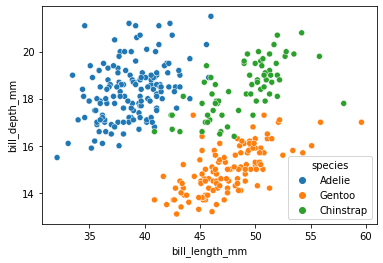

In [63]:
sns.scatterplot(x=df['bill_length_mm'],y=df['bill_depth_mm'],hue=df['species'])

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

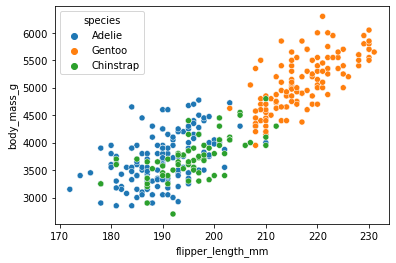

In [64]:
sns.scatterplot(x=df['flipper_length_mm'],y=df['body_mass_g'],hue=df['species'])

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

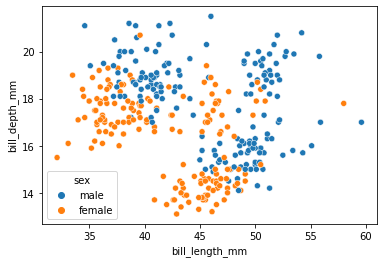

In [65]:
sns.scatterplot(x=df['bill_length_mm'],y=df['bill_depth_mm'],hue=df['sex'])

<AxesSubplot:xlabel='species', ylabel='island'>

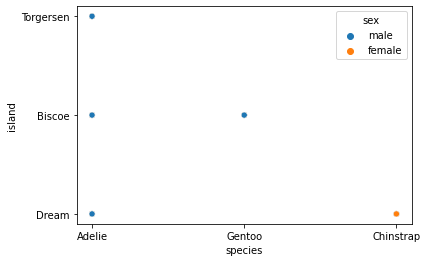

In [66]:
sns.scatterplot(x=df['species'],y=df['island'],hue=df['sex'])

<AxesSubplot:xlabel='flipper_length_mm', ylabel='island'>

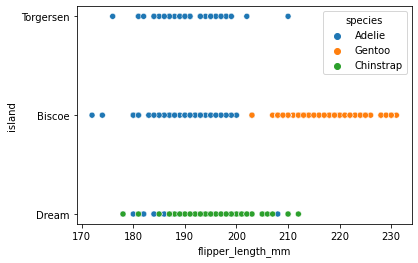

In [67]:
sns.scatterplot(x=df['flipper_length_mm'],y=df['island'],hue=df['species'])

<AxesSubplot:xlabel='body_mass_g', ylabel='island'>

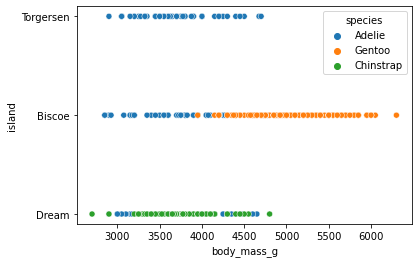

In [68]:
sns.scatterplot(x=df['body_mass_g'],y=df['island'],hue=df['species'])

In [69]:
df[df['species']=='Chinstrap'].groupby(df['island']).sum()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Dream,3320.7,1252.6,13316,253850


In [70]:
df[df['species']=='Adelie'].groupby(df['island']).sum()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,1714.9,808.3,8307,163225
Dream,2118.6,1003.2,10446,203575
Torgersen,1834.8,867.2,9002,174300


In [71]:
df[df['species']=='Gentoo'].groupby(df['island']).sum()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,5660.6,1784.6,25851,606000


In [72]:
df[df['species']=='Gentoo']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
146,Gentoo,Biscoe,46.1,13.2,211,4500,female
147,Gentoo,Biscoe,50.0,16.3,230,5700,male
148,Gentoo,Biscoe,48.7,14.1,210,4450,female
149,Gentoo,Biscoe,50.0,15.2,218,5700,male
150,Gentoo,Biscoe,47.6,14.5,215,5400,male
...,...,...,...,...,...,...,...
260,Gentoo,Biscoe,47.2,13.7,214,4925,female
261,Gentoo,Biscoe,46.8,14.3,215,4850,female
262,Gentoo,Biscoe,50.4,15.7,222,5750,male
263,Gentoo,Biscoe,45.2,14.8,212,5200,female


In [73]:
df[df['species']=='Adelie']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
141,Adelie,Dream,36.6,18.4,184,3475,female
142,Adelie,Dream,36.0,17.8,195,3450,female
143,Adelie,Dream,37.8,18.1,193,3750,male
144,Adelie,Dream,36.0,17.1,187,3700,female


In [74]:
df[df['species']=='Chinstrap']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
265,Chinstrap,Dream,46.5,17.9,192,3500,female
266,Chinstrap,Dream,50.0,19.5,196,3900,male
267,Chinstrap,Dream,51.3,19.2,193,3650,male
268,Chinstrap,Dream,45.4,18.7,188,3525,female
269,Chinstrap,Dream,52.7,19.8,197,3725,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [75]:
chinstrap_sp=df[df['species']=='Chinstrap']
adelie_sp=df[df['species']=='Adelie']
gentoo_sp=df[df['species']=='Gentoo']

In [76]:
from sklearn.utils import resample 
upsampling_chinstrap=resample(chinstrap_sp,n_samples=len(gentoo_sp),replace=True,random_state=42)
downsampling_adelie=resample(adelie_sp,n_samples=len(gentoo_sp),replace=True,random_state=42)

In [77]:
sampled_data=pd.concat([downsampling_adelie,upsampling_chinstrap,gentoo_sp])
sampled_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
102,Adelie,Biscoe,38.1,17.0,181,3175,female
92,Adelie,Dream,33.1,16.1,178,2900,female
14,Adelie,Torgersen,46.0,21.5,194,4200,male
106,Adelie,Biscoe,39.7,17.7,193,3200,female
71,Adelie,Torgersen,37.2,19.4,184,3900,male
...,...,...,...,...,...,...,...
260,Gentoo,Biscoe,47.2,13.7,214,4925,female
261,Gentoo,Biscoe,46.8,14.3,215,4850,female
262,Gentoo,Biscoe,50.4,15.7,222,5750,male
263,Gentoo,Biscoe,45.2,14.8,212,5200,female


In [78]:
sampled_data['species'].value_counts()

Gentoo       119
Adelie       119
Chinstrap    119
Name: species, dtype: int64

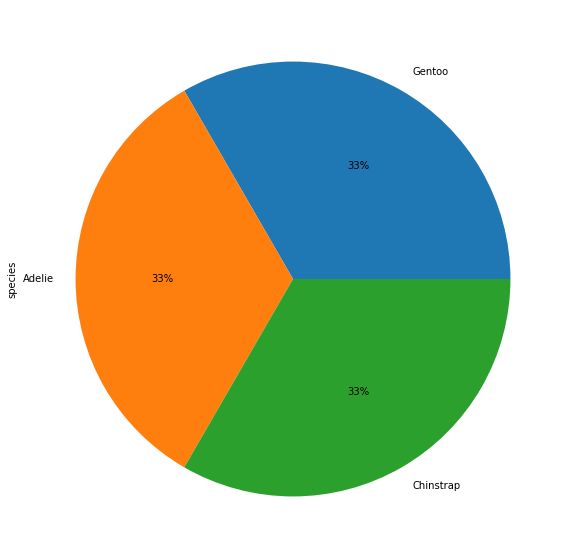

In [79]:
plt.figure(figsize=(10,10))
sampled_data['species'].value_counts().plot(kind='pie',autopct='%.f%%')
plt.show()

In [80]:
sampled_data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [81]:
df=sampled_data

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [87]:
df['species']=le.fit_transform(df['species'])


df['sex']=le.fit_transform(df['sex'])
df['species']=le.fit_transform(df['species'])
df['island']=le.fit_transform(df['island'])

In [89]:
df['species'].value_counts()

2    119
1    119
0    119
Name: species, dtype: int64

Adelie:0
Gentoo:2
Chinstrap:1

df['island'].value_counts()

Biscoe :0
Dream :1       
Torgersen :2

In [88]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
102,0,Biscoe,38.1,17.0,181,3175,female
92,0,Dream,33.1,16.1,178,2900,female
14,0,Torgersen,46.0,21.5,194,4200,male
106,0,Biscoe,39.7,17.7,193,3200,female
71,0,Torgersen,37.2,19.4,184,3900,male
...,...,...,...,...,...,...,...
260,2,Biscoe,47.2,13.7,214,4925,female
261,2,Biscoe,46.8,14.3,215,4850,female
262,2,Biscoe,50.4,15.7,222,5750,male
263,2,Biscoe,45.2,14.8,212,5200,female


In [82]:
X1=df.iloc[:,1:]

In [83]:
X=pd.get_dummies(data=X1,drop_first=True)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
102,38.1,17.0,181,3175,0,0,0
92,33.1,16.1,178,2900,1,0,0
14,46.0,21.5,194,4200,0,1,1
106,39.7,17.7,193,3200,0,0,0
71,37.2,19.4,184,3900,0,1,1
...,...,...,...,...,...,...,...
260,47.2,13.7,214,4925,0,0,0
261,46.8,14.3,215,4850,0,0,0
262,50.4,15.7,222,5750,0,0,1
263,45.2,14.8,212,5200,0,0,0


<AxesSubplot:>

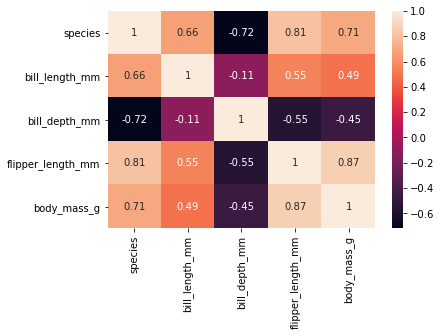

In [90]:
sns.heatmap(df.corr(),annot=True)

In [91]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
102,0,Biscoe,38.1,17.0,181,3175,female
92,0,Dream,33.1,16.1,178,2900,female
14,0,Torgersen,46.0,21.5,194,4200,male
106,0,Biscoe,39.7,17.7,193,3200,female
71,0,Torgersen,37.2,19.4,184,3900,male
...,...,...,...,...,...,...,...
260,2,Biscoe,47.2,13.7,214,4925,female
261,2,Biscoe,46.8,14.3,215,4850,female
262,2,Biscoe,50.4,15.7,222,5750,male
263,2,Biscoe,45.2,14.8,212,5200,female


In [103]:
#X=df.iloc[:,[0,1,2,3,6,7,8]]
y=df.iloc[:,0]

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.80,random_state=142)

In [105]:
X_train

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
282,58.0,17.8,181,3700,1,0,0
328,55.8,19.8,207,4000,1,0,1
267,51.3,19.2,193,3650,1,0,1
52,36.5,16.6,181,2850,0,0,0
43,42.3,21.2,191,4150,1,0,1
...,...,...,...,...,...,...,...
318,50.7,19.7,203,4050,1,0,1
50,39.0,17.5,186,3550,0,0,0
176,42.8,14.2,209,4700,0,0,0
275,46.6,17.8,193,3800,1,0,0


In [106]:
X_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
292,49.5,19.0,200,3800,1,0,1
129,41.1,17.5,190,3900,1,0,1
285,42.4,17.3,181,3600,1,0,0
47,42.0,19.5,200,4050,0,0,1
254,49.8,15.9,229,5950,0,0,1
...,...,...,...,...,...,...,...
327,45.7,17.0,195,3650,1,0,0
285,42.4,17.3,181,3600,1,0,0
242,48.4,14.4,203,4625,0,0,0
39,37.0,16.9,185,3000,1,0,0


In [107]:
y_train

282    1
328    1
267    1
52     0
43     0
      ..
318    1
50     0
176    2
275    1
185    2
Name: species, Length: 285, dtype: int32

In [108]:
y_test

292    1
129    0
285    1
47     0
254    2
      ..
327    1
285    1
242    2
39     0
223    2
Name: species, Length: 72, dtype: int32

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [111]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [112]:
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        92
           1       0.98      1.00      0.99        99
           2       1.00      1.00      1.00        94

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285



In [114]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        25

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [115]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [116]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [117]:
y_test_pred_logreg=logreg.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred_logreg)

1.0

In [119]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [120]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [121]:
y_test_pred_dtc=dtc.predict(X_test)
accuracy_score(y_test,y_test_pred_dtc)

0.9722222222222222

In [122]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,max_depth=5,criterion='entropy')

In [123]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=20)

In [124]:
y_test_pred_rfc=rfc.predict(X_test)
accuracy_score(y_test,y_test_pred_rfc)

0.9722222222222222

In [125]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')

In [126]:
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [127]:
y_test_pred_svc=svc.predict(X_test)
accuracy_score(y_test,y_test_pred_svc)

1.0

In [128]:
import pickle
file= open('knn.pkl','wb')
pickle.dump(knn,file)

In [129]:
pickle.dump(rfc,open('rfc.pkl','wb'))

In [130]:
pickle.dump(logreg,open('logreg.pkl','wb'))

In [131]:
pickle.dump(dtc,open('dtc.pkl','wb'))

In [132]:
pickle.dump(svc,open('svc.pkl','wb'))

# predicting

In [133]:
# example 1

In [134]:
X1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
102,0,Biscoe,38.1,17.0,181,3175,female
92,0,Dream,33.1,16.1,178,2900,female
14,0,Torgersen,46.0,21.5,194,4200,male
106,0,Biscoe,39.7,17.7,193,3200,female
71,0,Torgersen,37.2,19.4,184,3900,male
...,...,...,...,...,...,...,...
260,2,Biscoe,47.2,13.7,214,4925,female
261,2,Biscoe,46.8,14.3,215,4850,female
262,2,Biscoe,50.4,15.7,222,5750,male
263,2,Biscoe,45.2,14.8,212,5200,female


dtc.predict([[38.1,17.0,181,3175,0,0,0]])

In [137]:
rfc.predict([[38.1,17.0,181,3175,0,0,0]])

array([2])

logreg.predict([[38.1,17.0,181,3175,0,1,0]])

svc.predict([[38.1,17.0,181,3175,0,0,1]])

In [ ]:
# example 2

dtc.predict([[50.4,15.7,222,5750,0,0,1]])

In [141]:
rfc.predict([[50.4,15.7,222,5750,0,0,1]])

array([2])

logreg.predict([[50.4,15.7,222,5750,0,0,1]])

svc.predict([[50.4,15.7,222,5750,0,0,1]])

In [ ]:
# example 3

dtc.predict([[46.0,21.5,194,4200,0,1,1]])

In [145]:
rfc.predict([[46.0,21.5,194,4200,0,1,1]])

array([2])

logreg.predict([[46.0,21.5,194,4200,0,1,1]])

svc.predict([[46.0,21.5,194,4200,0,1,1]])

In [148]:
rfc.predict([[15.0,10.5,160,1500,0,0,0]])

array([2])

In [ ]:
# example 4

dtc.predict([[33.1,16.1,178,2900,1,1,0]])

In [150]:
rfc.predict([[43.1,26.1,185,5000,1,1,0]])

array([1])

logreg.predict([[33.1,16.1,178,2900,1,1,0]])

svc.predict([[33.1,16.1,178,2900,1,1,0]])

In [157]:
rfc.predict([[33.1,30.1,180,4500,1,1,0]])

array([1])

knn.predict([[43.1,26.1,185,5000,1,1,0]])

knn.predict([[46.0,21.5,194,4200,0,1,1]])

knn.predict([[26.0,21.5,180,2700,0,0,0]])